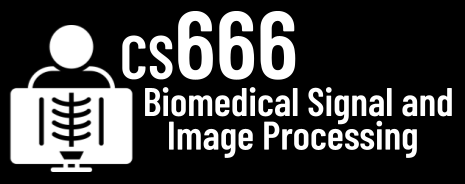
#Assignment 5

In [ ]:
# NAME: Krishna Prasad

In [1]:
# In this assignment, we will visualize and explore a CT scan!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [7]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [8]:
# TODO: 220 

In [9]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [10]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

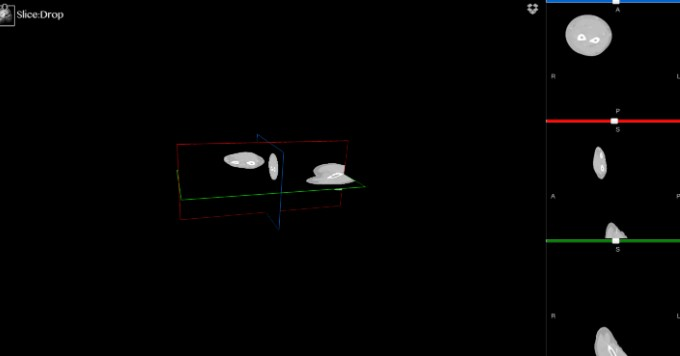


In [11]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [12]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

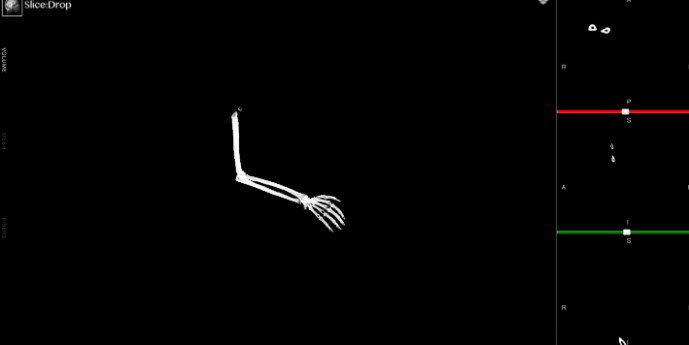


**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [13]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [18]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [15]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [16]:
from pydicom import dcmread

In [17]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [53]:
import numpy as np
import os

dir_path = "ct"
#DICOM files in the directory
file_names = os.listdir(dir_path)
file_names.sort()

# dimensions of first file
first_file_path = os.path.join(dir_path, file_names[0])
first_file = dcmread(first_file_path)
dims = list(first_file.pixel_array.shape) + [len(file_names)] #final list dimensions

#numpy array with zeros to allocate the data
ct_array = np.zeros(dims, dtype=np.uint16)

#Loop through all the DICOM files and store the image data
for i, file_name in enumerate(file_names):
    file_path = os.path.join(dir_path, file_name)
    dicom_file = dcmread(file_path)
    ct_array[:, :, i] = dicom_file.pixel_array
     

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [20]:
# TODO: YOUR CODE FOR AXIAL

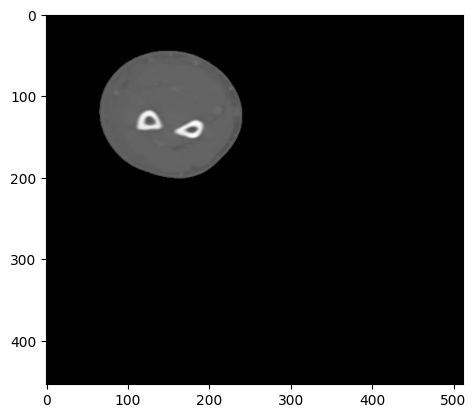

In [54]:
import matplotlib.pyplot as plt

axial = plt.plot()
plt.imshow(ct_array[:, :, dims[2]//2], cmap='gray')

In [22]:
|# TODO: YOUR CODE FOR SAGITTAL

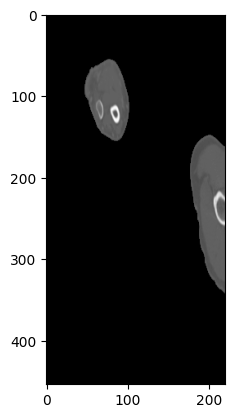

In [55]:
sagittal = plt.plot()
plt.imshow(ct_array[:, dims[1]//2, :], cmap='gray')

In [24]:
# TODO: YOUR CODE FOR CORONAL

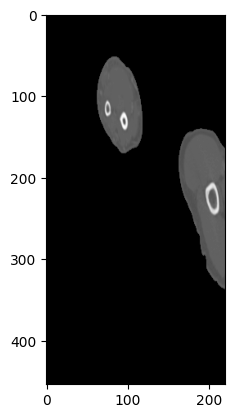

In [56]:
coronal = plt.plot()
plt.imshow(ct_array[:, dims[0]//2, :], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [27]:
# TODO: YOUR CODE

-1024
30
410


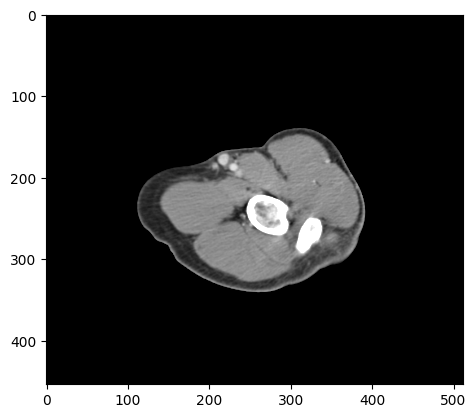

In [57]:
dicom_file

window_center = dicom_file.WindowCenter
window_width = dicom_file.WindowWidth
rescale_int = dicom_file['RescaleIntercept'].value


print(rescale_int)
print(window_center)
print(window_width)

vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [29]:
# TODO: YOUR CODE

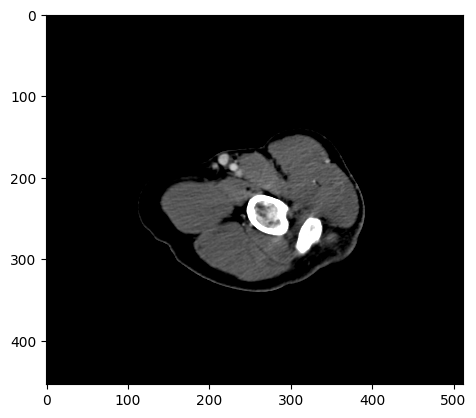

In [58]:
window_center = 100
window_width = 300
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
     

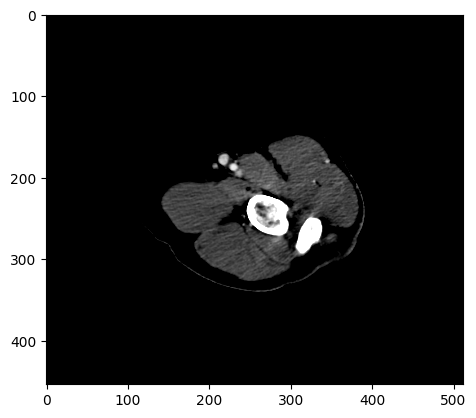

In [47]:
window_center = 100
window_width = 200
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

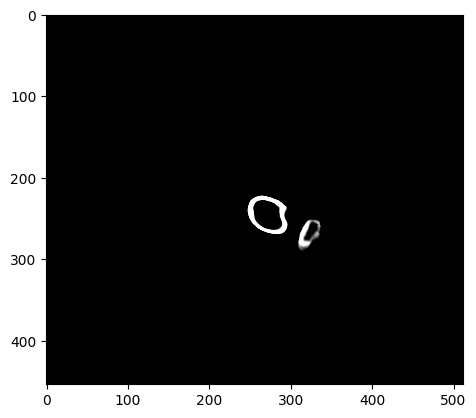

In [59]:

window_center = 500
window_width = 300
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

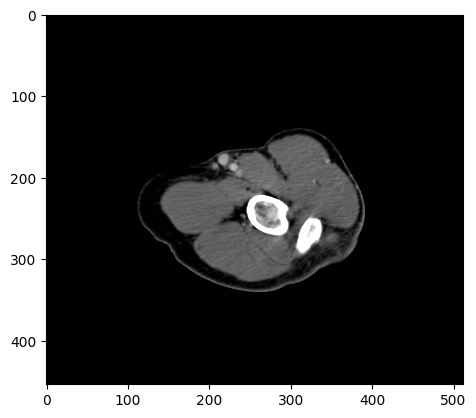

In [52]:
window_center = 100
window_width = 400
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [48]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

There is no one fit for all kind of value as the data set is not identical with respect to the data in it. So the values constantly depends upon the respective data at that point.


**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [60]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_mask = ct_array.copy()
fat_mask[fat_mask > -60] = 0
fat_mask = np.int16(fat_mask)

In [61]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
tissue_mask = ct_array.copy()
tissue_mask[tissue_mask < 30] = 0
tissue_mask[tissue_mask > 100] = 0
tissue_mask = np.int16(tissue_mask)

In [62]:
# TODO: YOUR CODE TO SEGMENT BONES
bone_mask = ct_array.copy()
bone_mask[bone_mask < 300] = 0
bone_mask = np.int16(bone_mask)

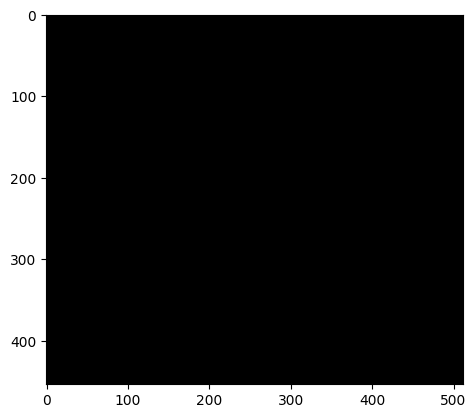

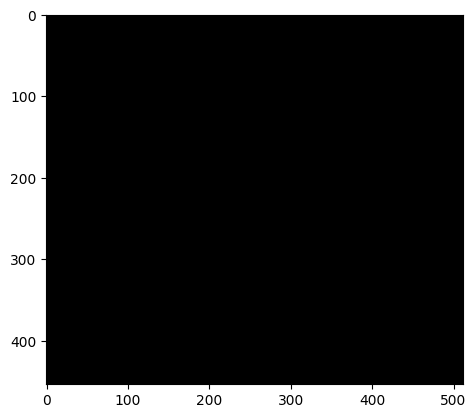

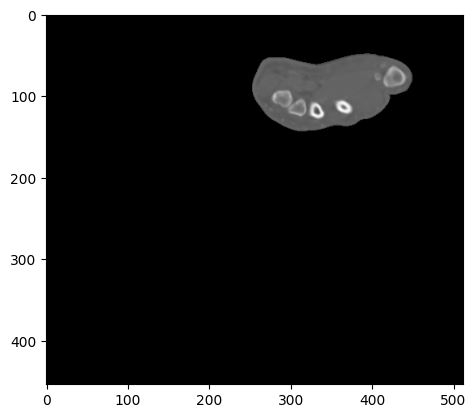

In [63]:
# Segment Fat
plt.imshow(fat_mask[:, :, 50], cmap='gray')
plt.show()

# Segment Soft tissue
plt.imshow(tissue_mask[:, :, 50], cmap='gray')
plt.show()

# Segment bone
plt.imshow(bone_mask[:, :, 50], cmap='gray')
plt.show()

In [31]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

Nope the segmentation is clearly not good. But the reasons why it is not good depends on many factors. 

In [ ]:
#Kevin Raj

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""